In [1]:
import pandas
import pickle
from IPython.display import display
from biotite.sequence.phylo import upgma
from matplotlib import pyplot
from io import StringIO
from Bio import Phylo

In [2]:
data_path = "../../../data"

In [3]:
df = pandas.read_csv(f"{data_path}/final_cluster.csv")

In [4]:
df.describe()

,Right,Total
count,180.000000,180.0
mean,7.766667,14.0
std,6.124500,0.0
min,0.000000,14.0
25%,0.000000,14.0
50%,12.000000,14.0
75%,14.000000,14.0
max,14.000000,14.0


In [5]:
df.sort_values(by=" Right").head(30)

,Algoritm,Name,Family,Right,Total
179,Universal Quality Index,pongo_abelii_ENSPPYG00000006019.png,orthologs_neuroglobin,0,14
153,Universal Quality Index,gorilla_gorilla_ENSGGOG00000011478.png,orthologs_myoglobin,0,14
152,Universal Quality Index,aotus_nancymaae_ENSANAG00000020373.png,orthologs_myoglobin,0,14
151,Universal Quality Index,chlorocebus_sabaeus_ENSCSAG00000008174.png,orthologs_myoglobin,0,14
150,Universal Quality Index,pan_troglodytes_ENSPTRG00000023553.png,orthologs_myoglobin,0,14
149,Universal Quality Index,Homo_sapiens_ENSP00000333994_Hsap.png,orthologs_hemoglobin_beta,0,14
148,Universal Quality Index,Cebus_capucinus_ENSCCAP00000028244_Ccap.png,orthologs_hemoglobin_beta,0,14
147,Universal Quality Index,Pongo_abelii_ENSPPYP00000004109_Pabe.png,orthologs_hemoglobin_beta,0,14
113,MultiScale Structural Similarity Index Measure,mandrillus_leucophaeus_ENSMLEG00000035424.png,orthologs_neuroglobin,0,14
145,Universal Quality Index,Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu...,orthologs_hemoglobin_beta,0,14


In [6]:
df.columns

Index(['Algoritm', ' Name', ' Family', ' Right', ' Total'], dtype='object')

In [7]:
df[df[" Right"] == df[" Total"]][' Name'].size / df[' Name'].size

0.3388888888888889

In [8]:
with open(f"{data_path}/cluster_sim.pkl", "rb") as f:
    sim_hash = pickle.load(f)

In [9]:
dfs_all = dict()
for alg, results in sim_hash.items():
    dfs_all[alg] = pandas.DataFrame.from_dict(results)

In [10]:
for df_all in dfs_all.values():
    df_all.columns = [c.split("/")[-3].split(".")[0].split("_")[1] +"_"+ c.split("/")[-1].split(".")[0] for c in df_all.columns]
    df_all.index = [c.split("/")[-3].split(".")[0].split("_")[1] +"_"+ c.split("/")[-1].split(".")[0] for c in df_all.index]

In [11]:
fixed_dfs_all = {}
numpys_all = {}
for alg, df_all in dfs_all.items():
    fixed_dfs_all[alg] = df_all.sort_index()[sorted(df_all.columns)]
    numpys_all[alg] = fixed_dfs_all[alg].to_numpy(na_value=0)

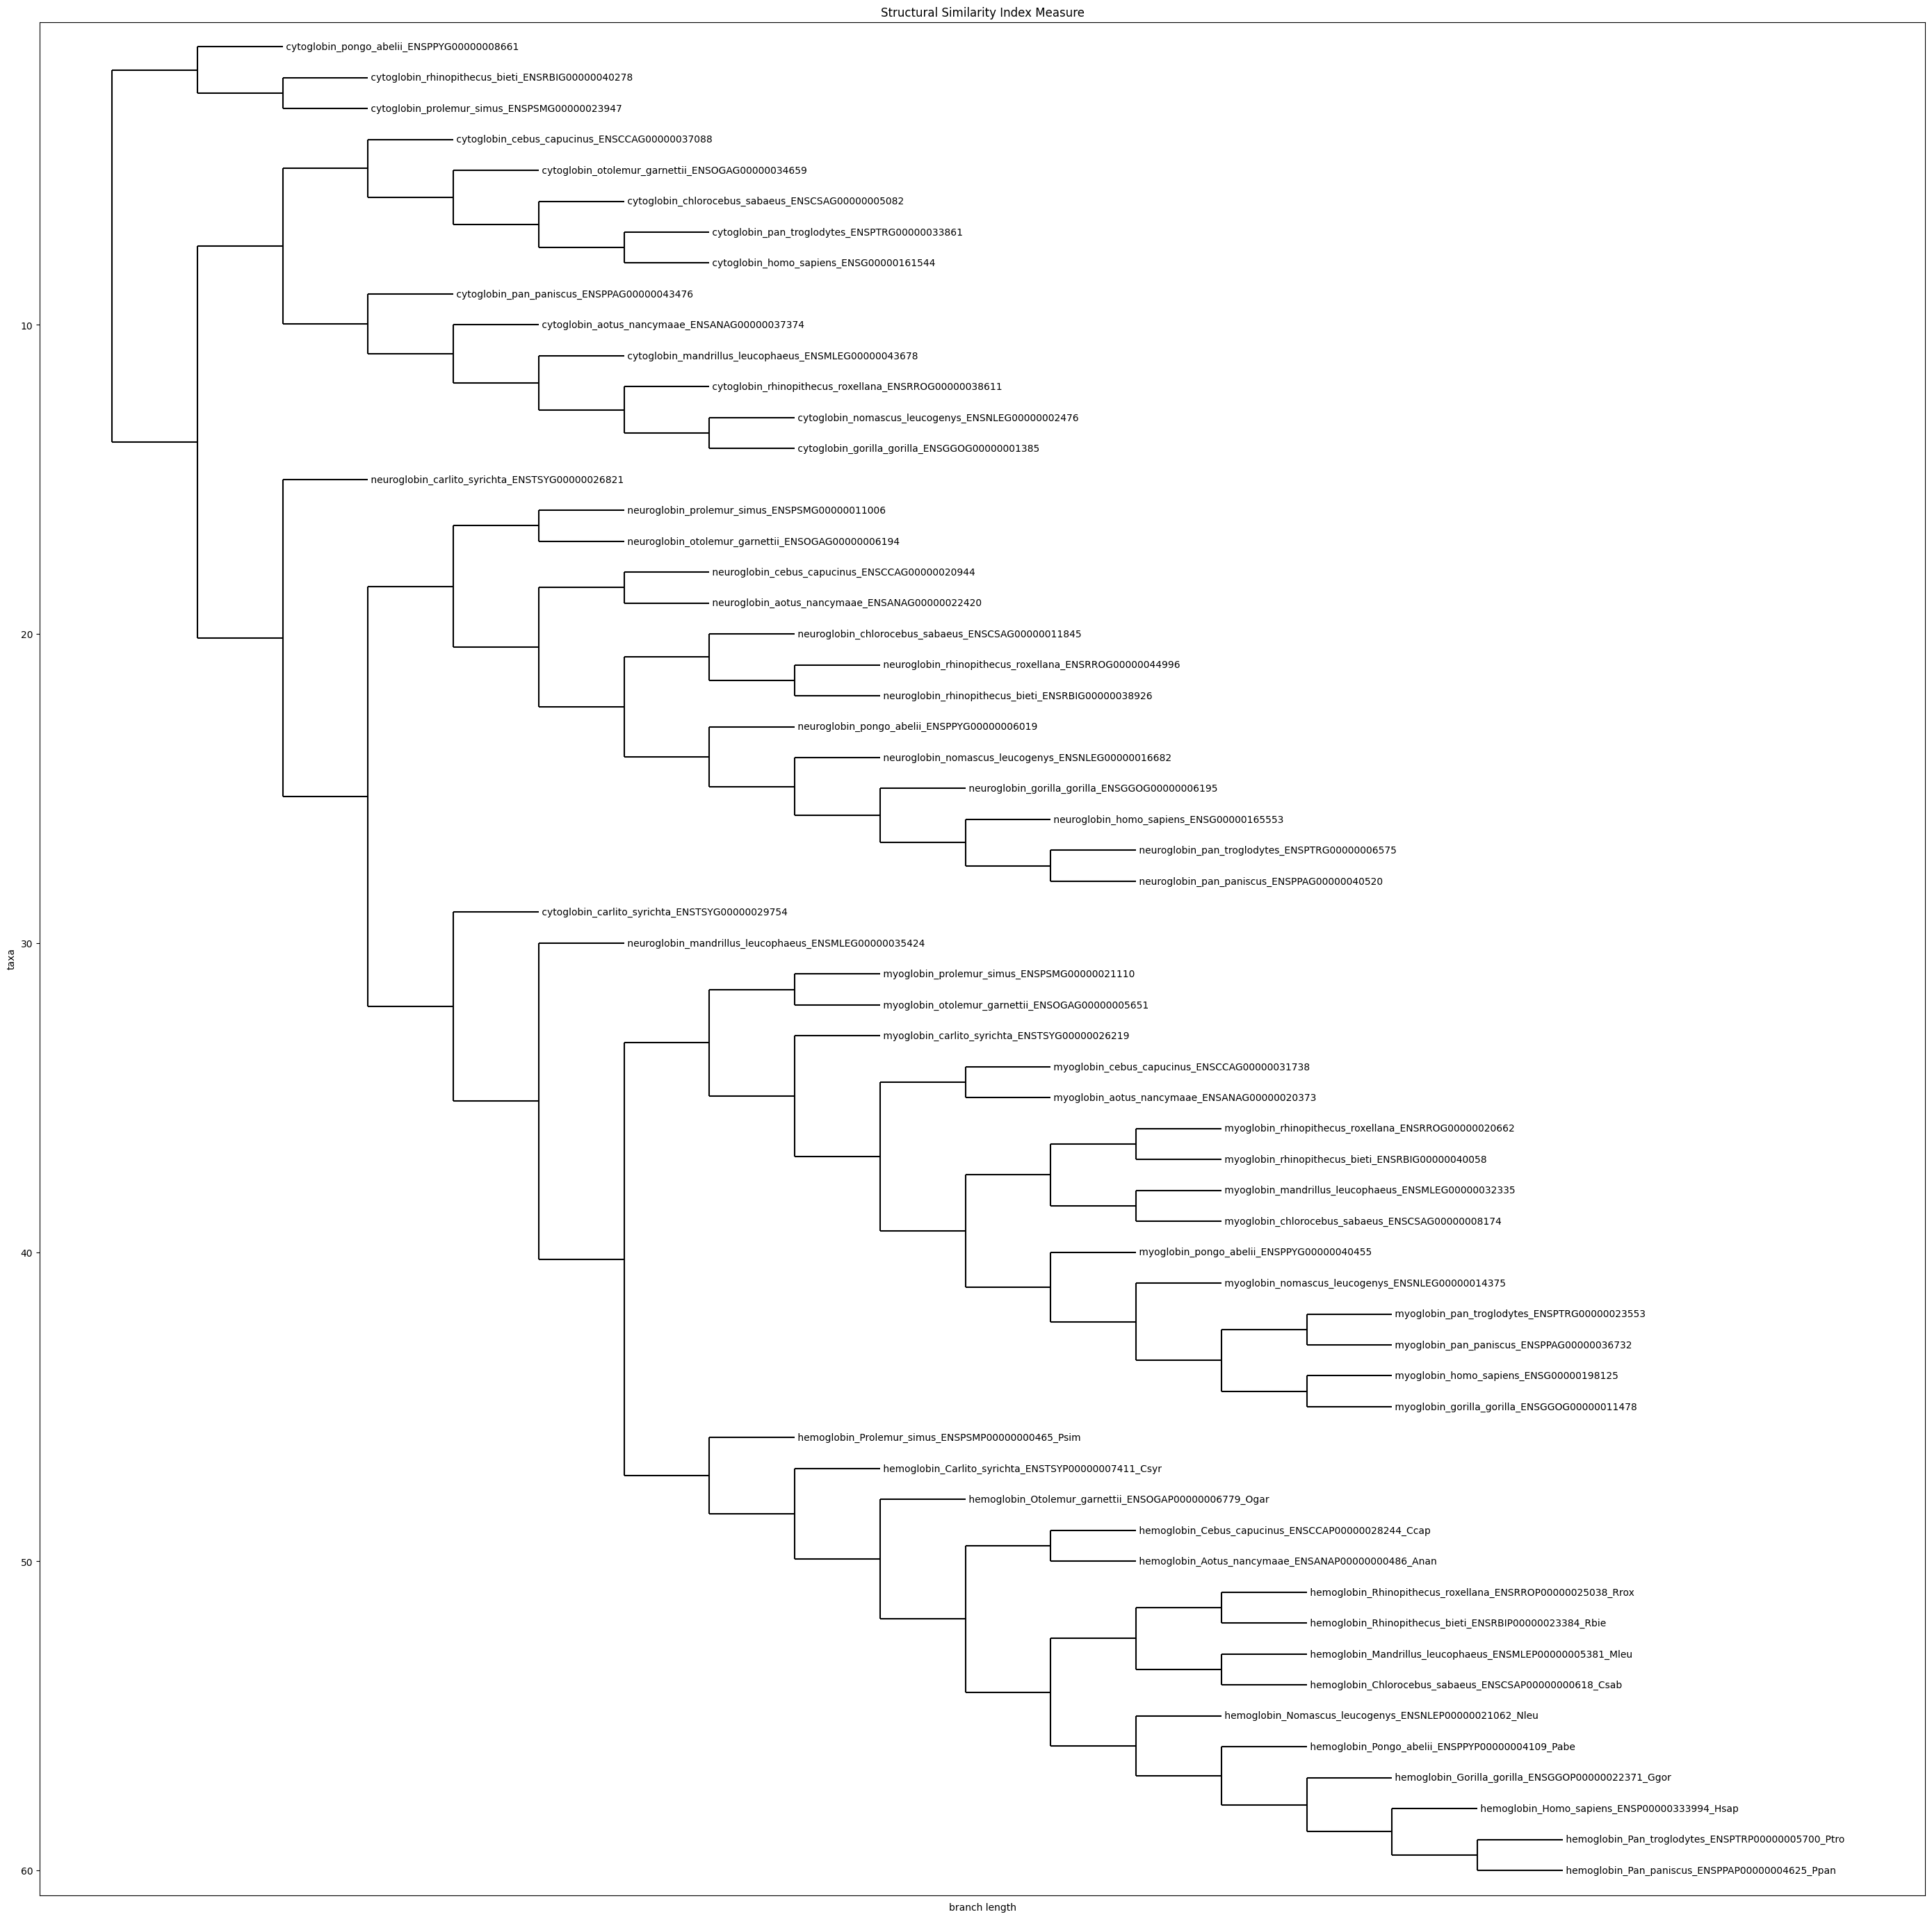

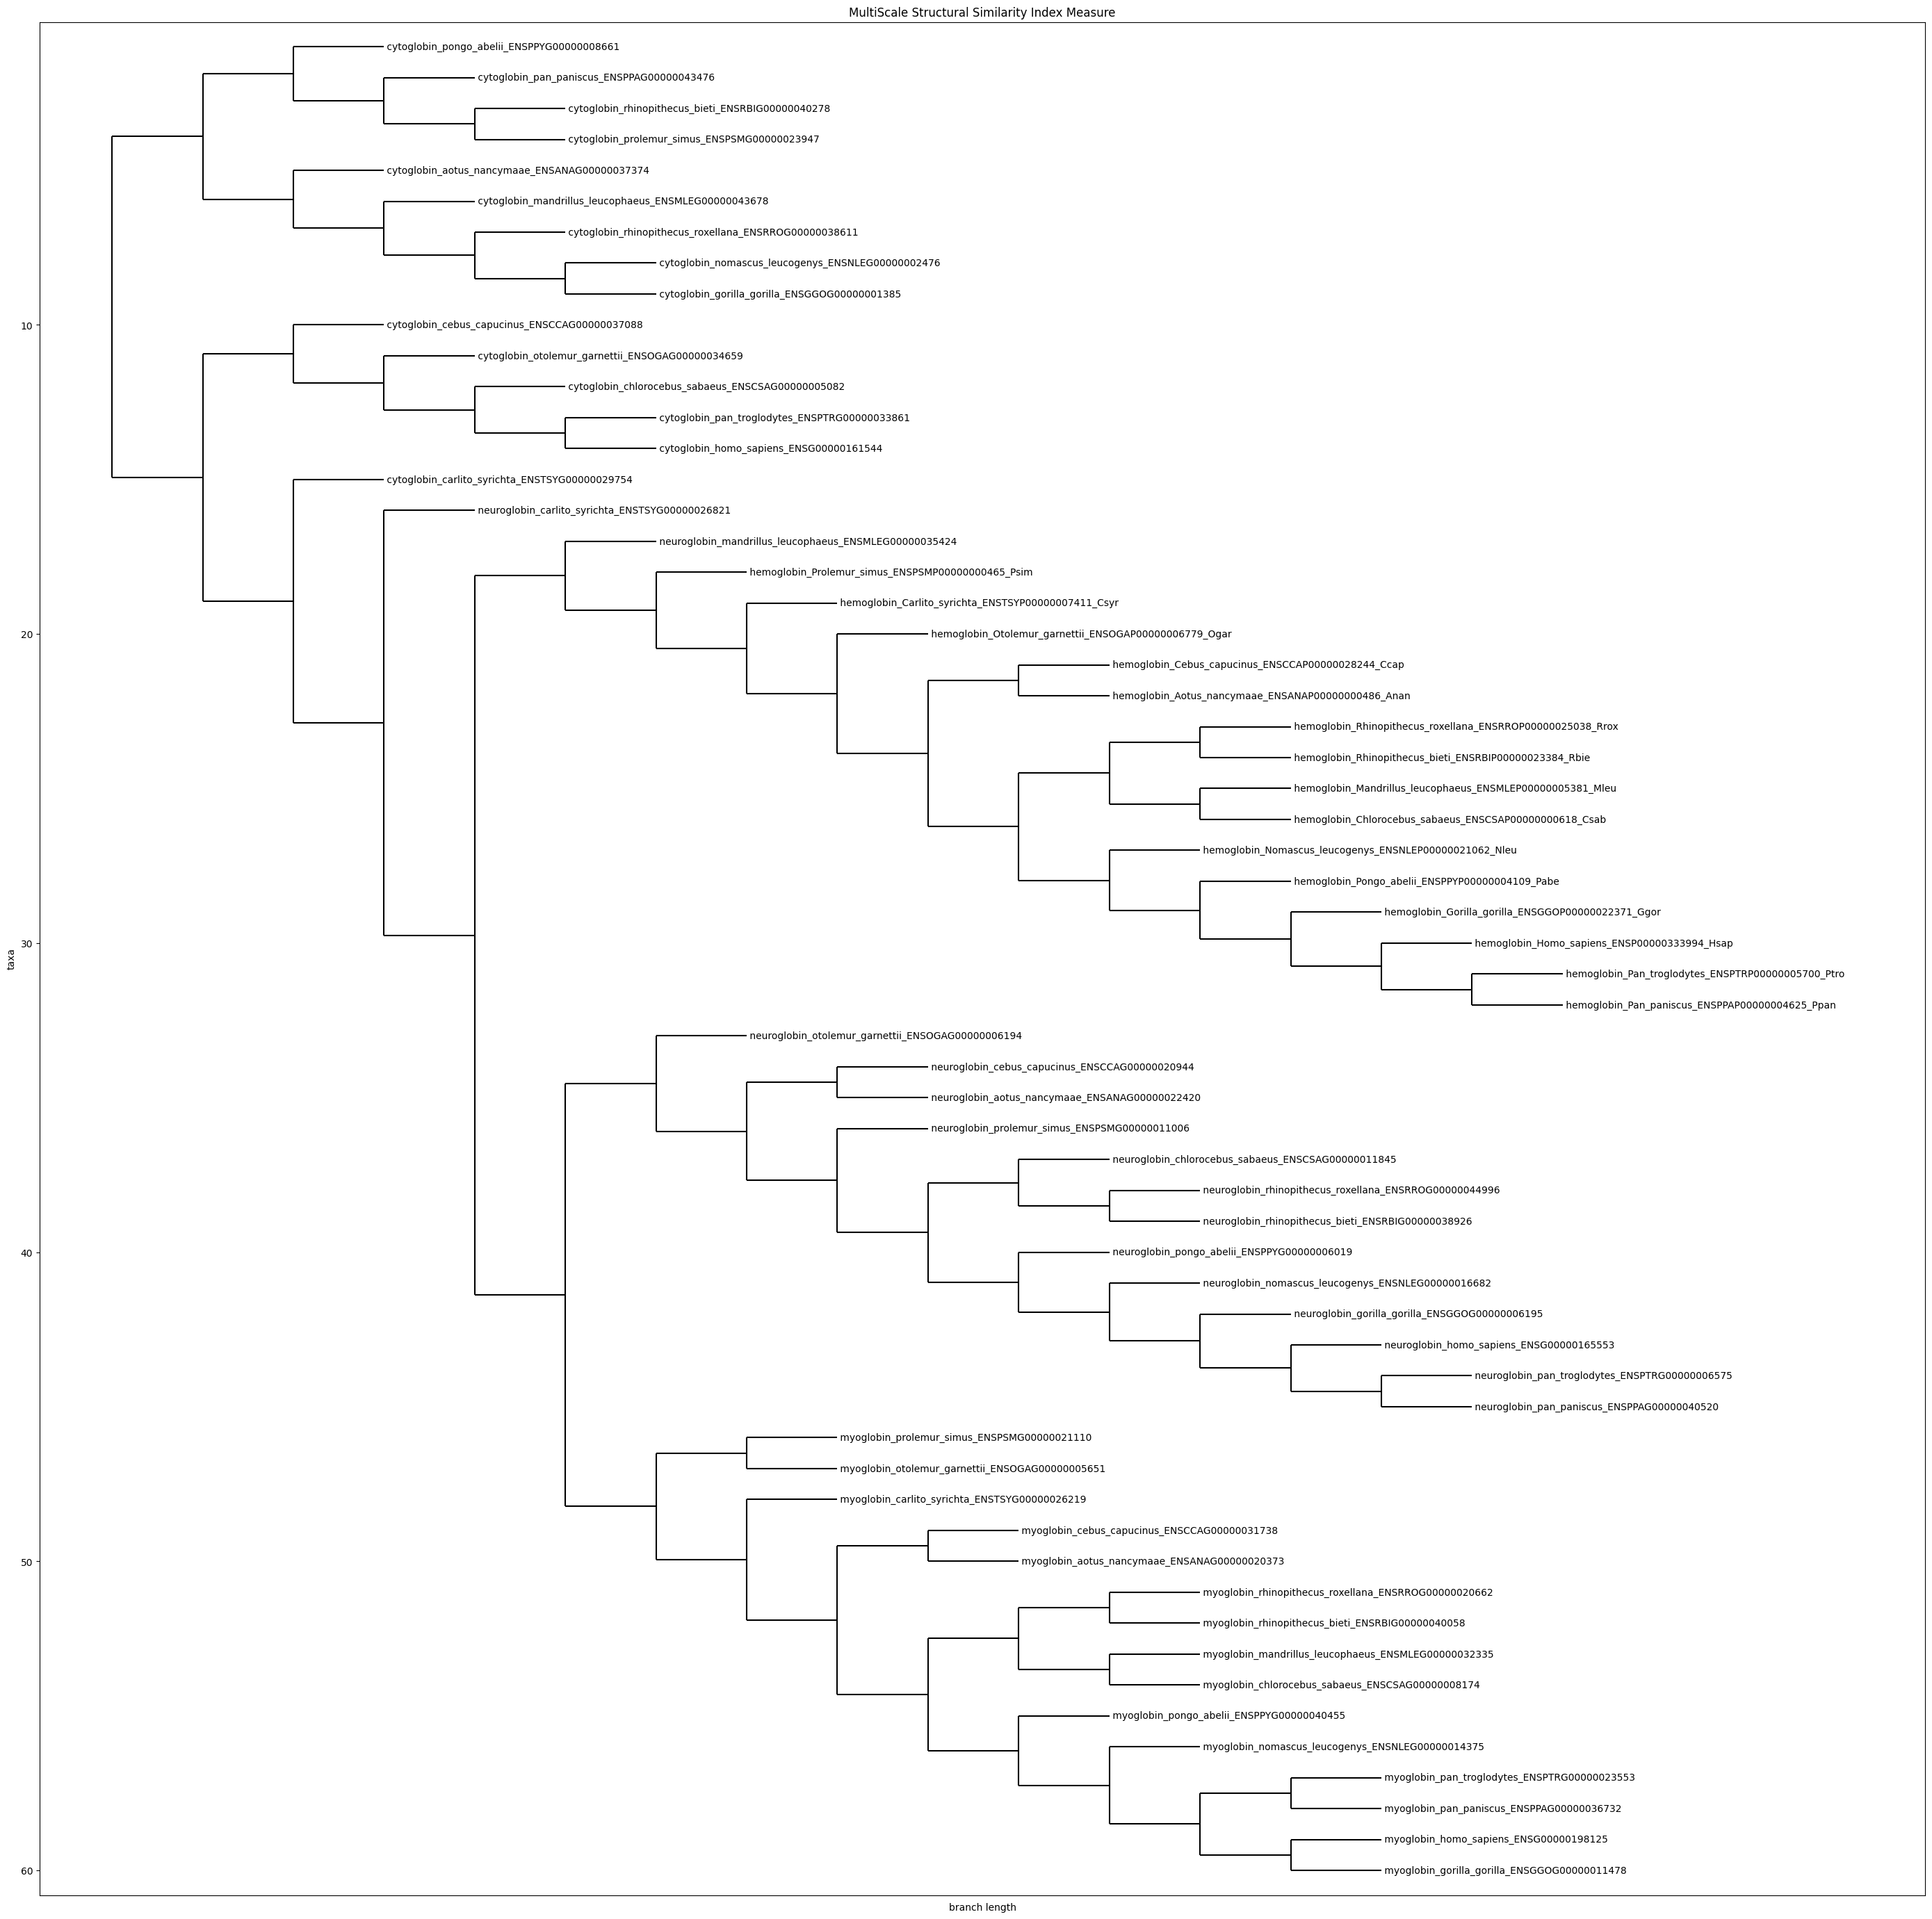

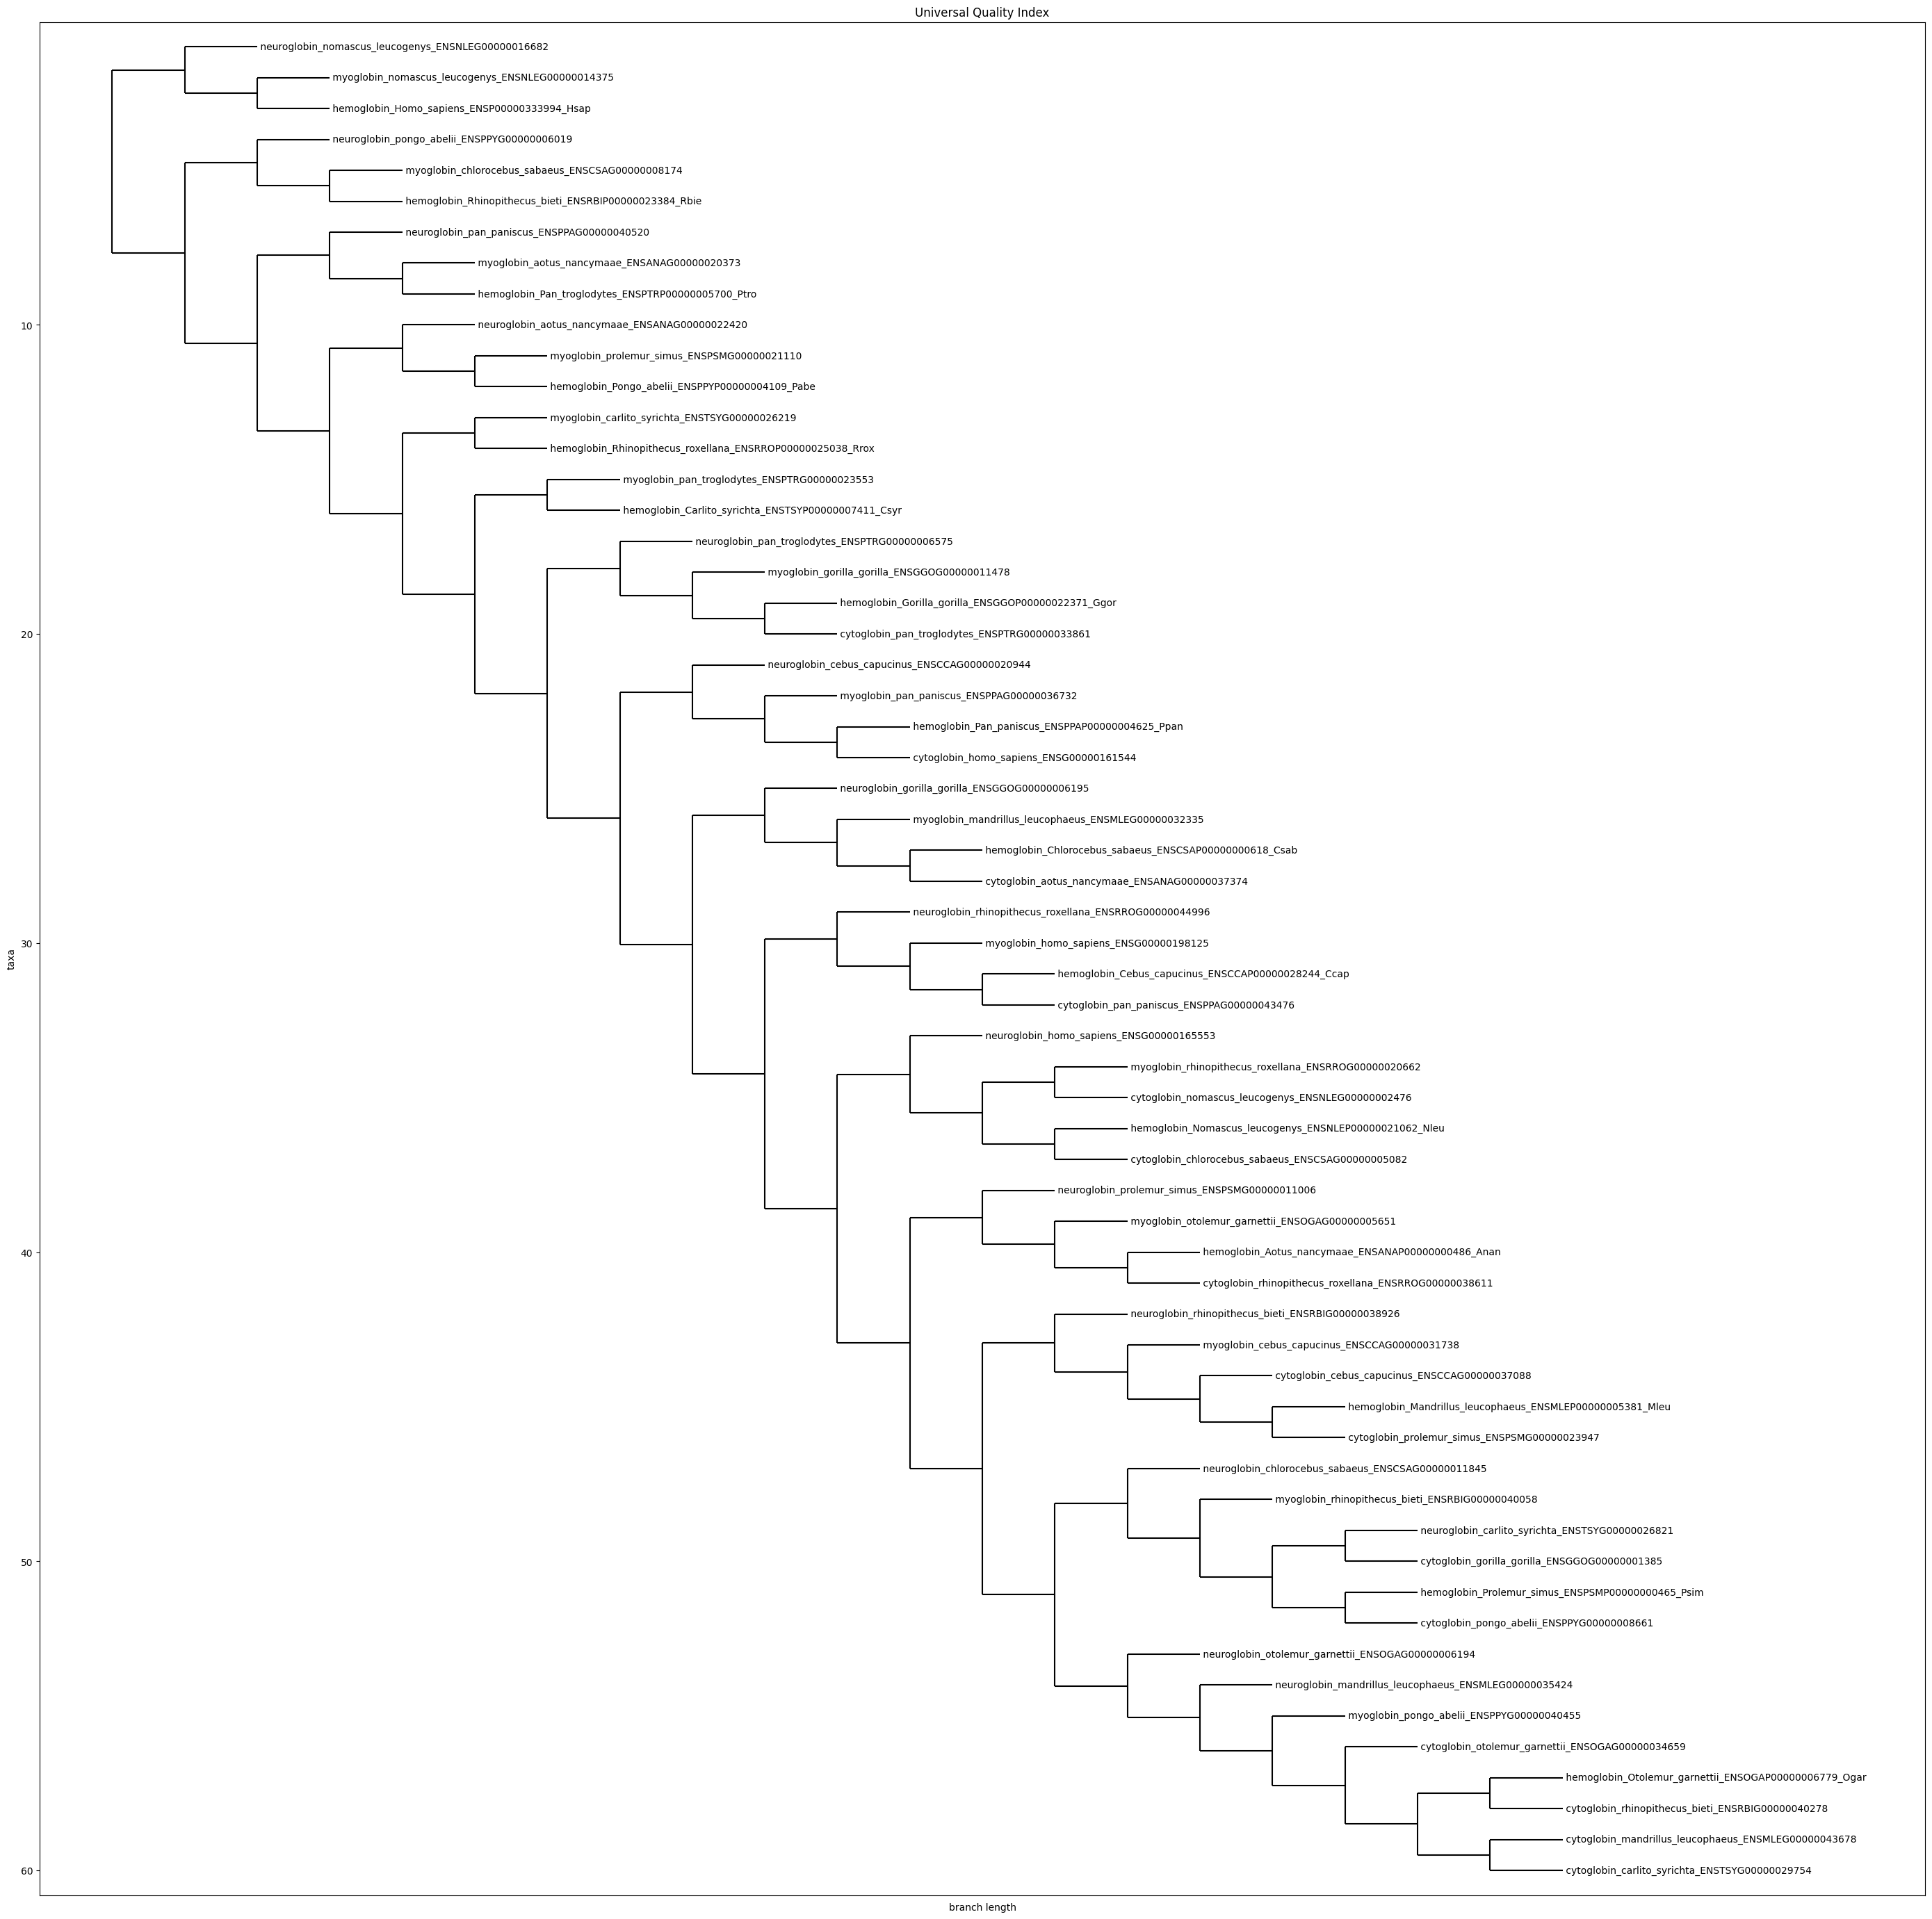

In [12]:
for alg, numpy_all in numpys_all.items():
    tree = upgma(1-numpy_all)
    fig, ax = pyplot.subplots(1, 1, figsize=(35, 35))
    newick = tree.to_newick(include_distance=False)
    t = Phylo.read(StringIO(newick), "newick")
    t.ladderize()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_title(alg)
    Phylo.draw(
        t,
        show_confidence=False,
        axes=ax,
        do_show=False,
        label_func=lambda clade: "" if not clade.name else list(fixed_dfs_all[alg].columns)[int(clade.name)],
        branch_labels=lambda clade: "" if not clade.name else "{:.2f}".format(
            clade.confidence) if clade.confidence else ""
    )
    pyplot.show()

In [13]:
for alg, fixed_df_all in fixed_dfs_all.items():
    k=14
    by_homologues = {}
    only_homologues = {}
    for column in fixed_df_all.columns:
        if column.split("_")[0] in by_homologues:
            by_homologues[column.split("_")[0]] += list(fixed_df_all[column].sort_values(ascending=False).index[:k])
            only_homologues[column.split("_")[0]] += [i.split("_")[0] for i in fixed_df_all[column].sort_values(ascending=False).index[:k]]
        else:
            by_homologues[column.split("_")[0]] = list(fixed_df_all[column].sort_values(ascending=False).index[:k])
            only_homologues[column.split("_")[0]] = [i.split("_")[0] for i in fixed_df_all[column].sort_values(ascending=False).index[:k]]

    #Precision
    print(f"--------{alg}--------")
    for h in only_homologues:
        print(h)
        print(sum([i==h for i in only_homologues[h]])/len(only_homologues[h]))

--------Structural Similarity Index Measure--------
cytoglobin
0.40476190476190477
hemoglobin
1.0
myoglobin
1.0
neuroglobin
0.7428571428571429
--------MultiScale Structural Similarity Index Measure--------
cytoglobin
0.5952380952380952
hemoglobin
1.0
myoglobin
1.0
neuroglobin
0.7619047619047619
--------Universal Quality Index--------
cytoglobin
0.1523809523809524
hemoglobin
0.0
myoglobin
0.0
neuroglobin
0.0


In [14]:
pandas.set_option('display.max_columns', 500) 
for alg, fixed_df_all in fixed_dfs_all.items():
    print(f"--------{alg}--------")
    display(fixed_df_all.describe())

--------Structural Similarity Index Measure--------


,cytoglobin_aotus_nancymaae_ENSANAG00000037374,cytoglobin_carlito_syrichta_ENSTSYG00000029754,cytoglobin_cebus_capucinus_ENSCCAG00000037088,cytoglobin_chlorocebus_sabaeus_ENSCSAG00000005082,cytoglobin_gorilla_gorilla_ENSGGOG00000001385,cytoglobin_homo_sapiens_ENSG00000161544,cytoglobin_mandrillus_leucophaeus_ENSMLEG00000043678,cytoglobin_nomascus_leucogenys_ENSNLEG00000002476,cytoglobin_otolemur_garnettii_ENSOGAG00000034659,cytoglobin_pan_paniscus_ENSPPAG00000043476,cytoglobin_pan_troglodytes_ENSPTRG00000033861,cytoglobin_pongo_abelii_ENSPPYG00000008661,cytoglobin_prolemur_simus_ENSPSMG00000023947,cytoglobin_rhinopithecus_bieti_ENSRBIG00000040278,cytoglobin_rhinopithecus_roxellana_ENSRROG00000038611,hemoglobin_Aotus_nancymaae_ENSANAP00000000486_Anan,hemoglobin_Carlito_syrichta_ENSTSYP00000007411_Csyr,hemoglobin_Cebus_capucinus_ENSCCAP00000028244_Ccap,hemoglobin_Chlorocebus_sabaeus_ENSCSAP00000000618_Csab,hemoglobin_Gorilla_gorilla_ENSGGOP00000022371_Ggor,hemoglobin_Homo_sapiens_ENSP00000333994_Hsap,hemoglobin_Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu,hemoglobin_Nomascus_leucogenys_ENSNLEP00000021062_Nleu,hemoglobin_Otolemur_garnettii_ENSOGAP00000006779_Ogar,hemoglobin_Pan_paniscus_ENSPPAP00000004625_Ppan,hemoglobin_Pan_troglodytes_ENSPTRP00000005700_Ptro,hemoglobin_Pongo_abelii_ENSPPYP00000004109_Pabe,hemoglobin_Prolemur_simus_ENSPSMP00000000465_Psim,hemoglobin_Rhinopithecus_bieti_ENSRBIP00000023384_Rbie,hemoglobin_Rhinopithecus_roxellana_ENSRROP00000025038_Rrox,myoglobin_aotus_nancymaae_ENSANAG00000020373,myoglobin_carlito_syrichta_ENSTSYG00000026219,myoglobin_cebus_capucinus_ENSCCAG00000031738,myoglobin_chlorocebus_sabaeus_ENSCSAG00000008174,myoglobin_gorilla_gorilla_ENSGGOG00000011478,myoglobin_homo_sapiens_ENSG00000198125,myoglobin_mandrillus_leucophaeus_ENSMLEG00000032335,myoglobin_nomascus_leucogenys_ENSNLEG00000014375,myoglobin_otolemur_garnettii_ENSOGAG00000005651,myoglobin_pan_paniscus_ENSPPAG00000036732,myoglobin_pan_troglodytes_ENSPTRG00000023553,myoglobin_pongo_abelii_ENSPPYG00000040455,myoglobin_prolemur_simus_ENSPSMG00000021110,myoglobin_rhinopithecus_bieti_ENSRBIG00000040058,myoglobin_rhinopithecus_roxellana_ENSRROG00000020662,neuroglobin_aotus_nancymaae_ENSANAG00000022420,neuroglobin_carlito_syrichta_ENSTSYG00000026821,neuroglobin_cebus_capucinus_ENSCCAG00000020944,neuroglobin_chlorocebus_sabaeus_ENSCSAG00000011845,neuroglobin_gorilla_gorilla_ENSGGOG00000006195,neuroglobin_homo_sapiens_ENSG00000165553,neuroglobin_mandrillus_leucophaeus_ENSMLEG00000035424,neuroglobin_nomascus_leucogenys_ENSNLEG00000016682,neuroglobin_otolemur_garnettii_ENSOGAG00000006194,neuroglobin_pan_paniscus_ENSPPAG00000040520,neuroglobin_pan_troglodytes_ENSPTRG00000006575,neuroglobin_pongo_abelii_ENSPPYG00000006019,neuroglobin_prolemur_simus_ENSPSMG00000011006,neuroglobin_rhinopithecus_bieti_ENSRBIG00000038926,neuroglobin_rhinopithecus_roxellana_ENSRROG00000044996
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.222974,0.226013,0.226900,0.261513,0.241315,0.262350,0.225471,0.239944,0.260541,0.225359,0.262384,0.223623,0.226001,0.225603,0.228074,0.374691,0.350264,0.368712,0.381186,0.380503,0.382214,0.376967,0.380287,0.349656,0.381687,0.381687,0.382326,0.332788,0.381155,0.381704,0.360374,0.350987,0.361217,0.379932,0.379989,0.378933,0.377866,0.380196,0.340204,0.378317,0.378317,0.376390,0.356170,0.378720,0.376448,0.353925,0.224932,0.357517,0.365314,0.366318,0.369221,0.227704,0.368718,0.34

--------MultiScale Structural Similarity Index Measure--------


,cytoglobin_aotus_nancymaae_ENSANAG00000037374,cytoglobin_carlito_syrichta_ENSTSYG00000029754,cytoglobin_cebus_capucinus_ENSCCAG00000037088,cytoglobin_chlorocebus_sabaeus_ENSCSAG00000005082,cytoglobin_gorilla_gorilla_ENSGGOG00000001385,cytoglobin_homo_sapiens_ENSG00000161544,cytoglobin_mandrillus_leucophaeus_ENSMLEG00000043678,cytoglobin_nomascus_leucogenys_ENSNLEG00000002476,cytoglobin_otolemur_garnettii_ENSOGAG00000034659,cytoglobin_pan_paniscus_ENSPPAG00000043476,cytoglobin_pan_troglodytes_ENSPTRG00000033861,cytoglobin_pongo_abelii_ENSPPYG00000008661,cytoglobin_prolemur_simus_ENSPSMG00000023947,cytoglobin_rhinopithecus_bieti_ENSRBIG00000040278,cytoglobin_rhinopithecus_roxellana_ENSRROG00000038611,hemoglobin_Aotus_nancymaae_ENSANAP00000000486_Anan,hemoglobin_Carlito_syrichta_ENSTSYP00000007411_Csyr,hemoglobin_Cebus_capucinus_ENSCCAP00000028244_Ccap,hemoglobin_Chlorocebus_sabaeus_ENSCSAP00000000618_Csab,hemoglobin_Gorilla_gorilla_ENSGGOP00000022371_Ggor,hemoglobin_Homo_sapiens_ENSP00000333994_Hsap,hemoglobin_Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu,hemoglobin_Nomascus_leucogenys_ENSNLEP00000021062_Nleu,hemoglobin_Otolemur_garnettii_ENSOGAP00000006779_Ogar,hemoglobin_Pan_paniscus_ENSPPAP00000004625_Ppan,hemoglobin_Pan_troglodytes_ENSPTRP00000005700_Ptro,hemoglobin_Pongo_abelii_ENSPPYP00000004109_Pabe,hemoglobin_Prolemur_simus_ENSPSMP00000000465_Psim,hemoglobin_Rhinopithecus_bieti_ENSRBIP00000023384_Rbie,hemoglobin_Rhinopithecus_roxellana_ENSRROP00000025038_Rrox,myoglobin_aotus_nancymaae_ENSANAG00000020373,myoglobin_carlito_syrichta_ENSTSYG00000026219,myoglobin_cebus_capucinus_ENSCCAG00000031738,myoglobin_chlorocebus_sabaeus_ENSCSAG00000008174,myoglobin_gorilla_gorilla_ENSGGOG00000011478,myoglobin_homo_sapiens_ENSG00000198125,myoglobin_mandrillus_leucophaeus_ENSMLEG00000032335,myoglobin_nomascus_leucogenys_ENSNLEG00000014375,myoglobin_otolemur_garnettii_ENSOGAG00000005651,myoglobin_pan_paniscus_ENSPPAG00000036732,myoglobin_pan_troglodytes_ENSPTRG00000023553,myoglobin_pongo_abelii_ENSPPYG00000040455,myoglobin_prolemur_simus_ENSPSMG00000021110,myoglobin_rhinopithecus_bieti_ENSRBIG00000040058,myoglobin_rhinopithecus_roxellana_ENSRROG00000020662,neuroglobin_aotus_nancymaae_ENSANAG00000022420,neuroglobin_carlito_syrichta_ENSTSYG00000026821,neuroglobin_cebus_capucinus_ENSCCAG00000020944,neuroglobin_chlorocebus_sabaeus_ENSCSAG00000011845,neuroglobin_gorilla_gorilla_ENSGGOG00000006195,neuroglobin_homo_sapiens_ENSG00000165553,neuroglobin_mandrillus_leucophaeus_ENSMLEG00000035424,neuroglobin_nomascus_leucogenys_ENSNLEG00000016682,neuroglobin_otolemur_garnettii_ENSOGAG00000006194,neuroglobin_pan_paniscus_ENSPPAG00000040520,neuroglobin_pan_troglodytes_ENSPTRG00000006575,neuroglobin_pongo_abelii_ENSPPYG00000006019,neuroglobin_prolemur_simus_ENSPSMG00000011006,neuroglobin_rhinopithecus_bieti_ENSRBIG00000038926,neuroglobin_rhinopithecus_roxellana_ENSRROG00000044996
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.606655,0.626570,0.608533,0.645108,0.619233,0.645257,0.607101,0.614440,0.644620,0.609120,0.645564,0.599071,0.605393,0.607733,0.615671,0.714163,0.706625,0.712219,0.714439,0.715972,0.716491,0.712917,0.715712,0.701031,0.716220,0.716220,0.717690,0.700186,0.717177,0.717459,0.711382,0.704331,0.708899,0.717987,0.715807,0.714257,0.716635,0.716836,0.707057,0.715245,0.715245,0.714385,0.708113,0.717575,0.717149,0.711121,0.632845,0.710025,0.709481,0.711533,0.712133,0.643381,0.711968,0.70

--------Universal Quality Index--------


,cytoglobin_aotus_nancymaae_ENSANAG00000037374,cytoglobin_carlito_syrichta_ENSTSYG00000029754,cytoglobin_cebus_capucinus_ENSCCAG00000037088,cytoglobin_chlorocebus_sabaeus_ENSCSAG00000005082,cytoglobin_gorilla_gorilla_ENSGGOG00000001385,cytoglobin_homo_sapiens_ENSG00000161544,cytoglobin_mandrillus_leucophaeus_ENSMLEG00000043678,cytoglobin_nomascus_leucogenys_ENSNLEG00000002476,cytoglobin_otolemur_garnettii_ENSOGAG00000034659,cytoglobin_pan_paniscus_ENSPPAG00000043476,cytoglobin_pan_troglodytes_ENSPTRG00000033861,cytoglobin_pongo_abelii_ENSPPYG00000008661,cytoglobin_prolemur_simus_ENSPSMG00000023947,cytoglobin_rhinopithecus_bieti_ENSRBIG00000040278,cytoglobin_rhinopithecus_roxellana_ENSRROG00000038611,hemoglobin_Aotus_nancymaae_ENSANAP00000000486_Anan,hemoglobin_Carlito_syrichta_ENSTSYP00000007411_Csyr,hemoglobin_Cebus_capucinus_ENSCCAP00000028244_Ccap,hemoglobin_Chlorocebus_sabaeus_ENSCSAP00000000618_Csab,hemoglobin_Gorilla_gorilla_ENSGGOP00000022371_Ggor,hemoglobin_Homo_sapiens_ENSP00000333994_Hsap,hemoglobin_Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu,hemoglobin_Nomascus_leucogenys_ENSNLEP00000021062_Nleu,hemoglobin_Otolemur_garnettii_ENSOGAP00000006779_Ogar,hemoglobin_Pan_paniscus_ENSPPAP00000004625_Ppan,hemoglobin_Pan_troglodytes_ENSPTRP00000005700_Ptro,hemoglobin_Pongo_abelii_ENSPPYP00000004109_Pabe,hemoglobin_Prolemur_simus_ENSPSMP00000000465_Psim,hemoglobin_Rhinopithecus_bieti_ENSRBIP00000023384_Rbie,hemoglobin_Rhinopithecus_roxellana_ENSRROP00000025038_Rrox,myoglobin_aotus_nancymaae_ENSANAG00000020373,myoglobin_carlito_syrichta_ENSTSYG00000026219,myoglobin_cebus_capucinus_ENSCCAG00000031738,myoglobin_chlorocebus_sabaeus_ENSCSAG00000008174,myoglobin_gorilla_gorilla_ENSGGOG00000011478,myoglobin_homo_sapiens_ENSG00000198125,myoglobin_mandrillus_leucophaeus_ENSMLEG00000032335,myoglobin_nomascus_leucogenys_ENSNLEG00000014375,myoglobin_otolemur_garnettii_ENSOGAG00000005651,myoglobin_pan_paniscus_ENSPPAG00000036732,myoglobin_pan_troglodytes_ENSPTRG00000023553,myoglobin_pongo_abelii_ENSPPYG00000040455,myoglobin_prolemur_simus_ENSPSMG00000021110,myoglobin_rhinopithecus_bieti_ENSRBIG00000040058,myoglobin_rhinopithecus_roxellana_ENSRROG00000020662,neuroglobin_aotus_nancymaae_ENSANAG00000022420,neuroglobin_carlito_syrichta_ENSTSYG00000026821,neuroglobin_cebus_capucinus_ENSCCAG00000020944,neuroglobin_chlorocebus_sabaeus_ENSCSAG00000011845,neuroglobin_gorilla_gorilla_ENSGGOG00000006195,neuroglobin_homo_sapiens_ENSG00000165553,neuroglobin_mandrillus_leucophaeus_ENSMLEG00000035424,neuroglobin_nomascus_leucogenys_ENSNLEG00000016682,neuroglobin_otolemur_garnettii_ENSOGAG00000006194,neuroglobin_pan_paniscus_ENSPPAG00000040520,neuroglobin_pan_troglodytes_ENSPTRG00000006575,neuroglobin_pongo_abelii_ENSPPYG00000006019,neuroglobin_prolemur_simus_ENSPSMG00000011006,neuroglobin_rhinopithecus_bieti_ENSRBIG00000038926,neuroglobin_rhinopithecus_roxellana_ENSRROG00000044996
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.793774,0.792135,0.791292,0.755129,0.779020,0.753739,0.794806,0.778470,0.759324,0.794006,0.754110,0.795509,0.794781,0.794050,0.789932,0.641866,0.667332,0.648266,0.633900,0.633212,0.631178,0.639069,0.633211,0.667635,0.631389,0.631389,0.630913,0.684837,0.633557,0.633270,0.656818,0.661104,0.656132,0.635976,0.634841,0.636174,0.638241,0.634455,0.676709,0.636422,0.636422,0.639418,0.658566,0.637921,0.641015,0.656157,0.787562,0.652535,0.643982,0.642950,0.639908,0.784899,0.640343,0.66